In [67]:
#Build the random forest model after normalizing the variable to house pricing from boston data set

#Import the required libraries

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets

In [68]:
#Load the boston dataset
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

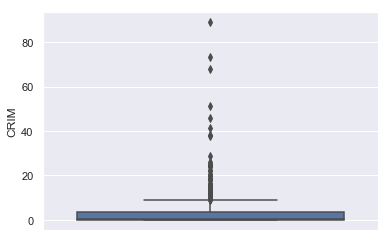

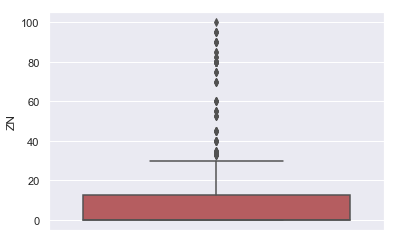

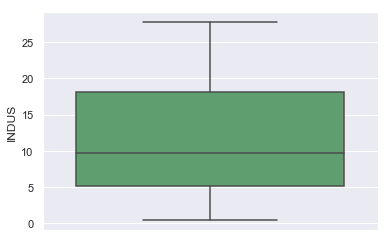

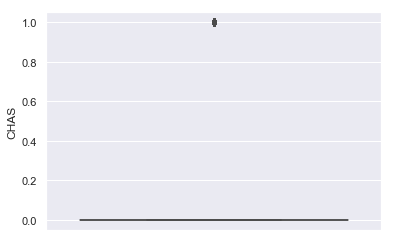

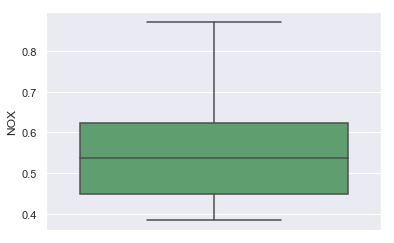

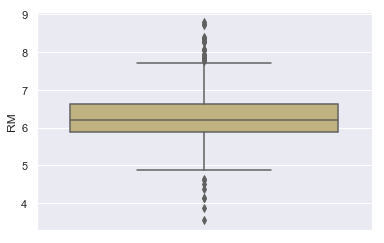

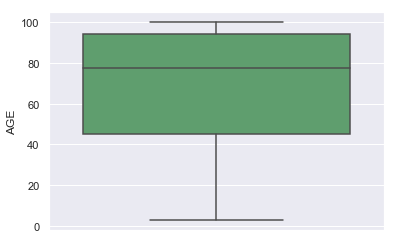

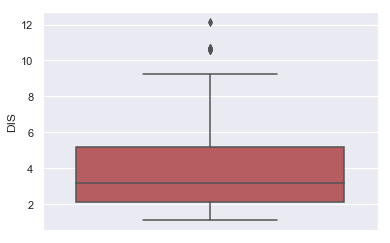

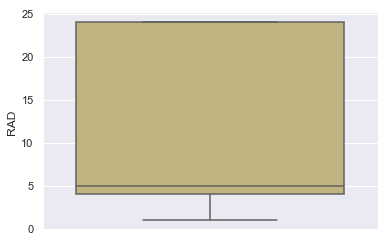

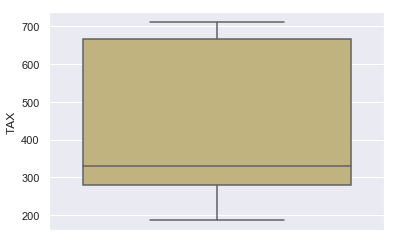

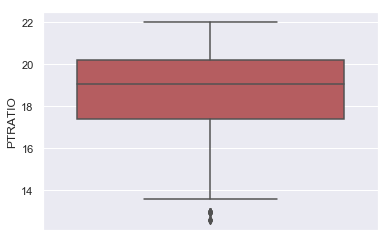

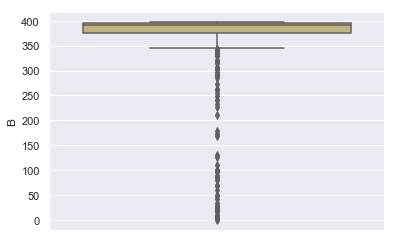

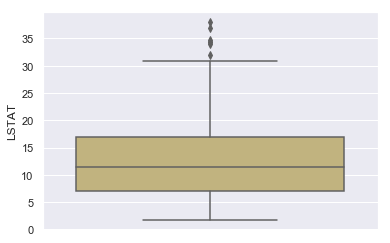

In [63]:
#Box plot to visualize the outliers
sns.set(color_codes=True)
colors = ["y", "b", "g", "r"]

cols = list(features.columns.values)

# draw a boxplot with vertical orientation
for i, col in enumerate(cols):
    sns.boxplot(features[col], color=random.choice(colors), orient="v")
    plt.show()   

In [76]:
#Perform outlier treatment using the inter-quartile range
for col in features.columns:
    q1 = features[col].quantile(0.25)
    q3 = features[col].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    percentiles = features[col].quantile([0.01,0.99]).values
    features[col][features[col] <= low] = percentiles[0]
    features[col][features[col] >= high] = percentiles[1]

In [77]:
#Normalize the dataset using StandardScaler
scaler = StandardScaler().fit(features)
scaled_X = scaler.transform(features)

In [83]:
#Split the data into train and test. Build and fit the model
X_train, X_test, y_train, y_test = train_test_split(scaled_X, targets, test_size=.2, random_state=0)
rfc2 = RandomForestRegressor(max_features=8, random_state=1)
#clf.fit(training_data_X, training_scores_encoded)
rfc2.fit(X_train, y_train)
y_pred = rfc2.predict(X_test)
print("The actual values are:", y_test)
print("The predicted values are:", y_pred)

The actual values are: [ 22.6  50.   23.    8.3  21.2  19.9  20.6  18.7  16.1  18.6   8.8  17.2
  14.9  10.5  50.   29.   23.   33.3  29.4  21.   23.8  19.1  20.4  29.1
  19.3  23.1  19.6  19.4  38.7  18.7  14.6  20.   20.5  20.1  23.6  16.8
   5.6  50.   14.5  13.3  23.9  20.   19.8  13.8  16.5  21.6  20.3  17.
  11.8  27.5  15.6  23.1  24.3  42.8  15.6  21.7  17.1  17.2  15.   21.7
  18.6  21.   33.1  31.5  20.1  29.8  15.2  15.   27.5  22.6  20.   21.4
  23.5  31.2  23.7   7.4  48.3  24.4  22.6  18.3  23.3  17.1  27.9  44.8
  50.   23.   21.4  10.2  23.3  23.2  18.9  13.4  21.9  24.8  11.9  24.3
  13.8  24.7  14.1  18.7  28.1  19.8]
The predicted values are: [ 24.46  34.49  23.17  12.48  20.37  20.64  21.63  19.49  20.15  19.48
   8.65  17.44  15.42   7.43  48.49  32.83  20.03  34.31  25.65  21.49
  23.39  23.23  20.47  24.39  20.22  21.21  17.45  15.52  39.21  18.91
  14.81  17.04  20.08  21.18  21.77  17.17   8.45  29.93  16.12  16.22
  24.34  20.65  22.32  16.78  22.26  21.61  20

In [84]:
#Calculate the absolute errors
errors = abs(y_pred - y_test)
#Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 2.76
